SIMULACION MICROGOTA EVAPORACION
======================

Primero, tenemos las variables:
$$\rho_a: \text{Densidad del aire}$$
$$\rho_d: \text{Densidad de la gota}$$
$$F_d: \text{Friccion con el aire}$$
$$E: \text{Empuje} $$
$$\eta: \text{Viscosidad dinamica del aire}$$

Resolvemos la ecuacion completa cuando se tiene una perdida de masa de la gota en la evaporacion, aca consideramos el termino $\dot{m} $:

$$m\frac{dv}{dt} + v\frac{dm}{dt}= E + F_d - mg = \frac{4\pi}{3} r_d^3 \rho_a g - 6\pi \eta r_d v - \frac{4\pi}{3} r_d^3 \rho_d g $$ 

luego

$$ \frac{dv}{dt}= \left( \frac{\rho_a}{\rho_d} - 1 \right) g - \frac{9 \eta}{2  r^2(t) \rho_d}  v  - \frac{v}{m}\frac{dm}{dt}  $$

$$ \frac{dv}{dt}= \left( \frac{\rho_a}{\rho_d} - 1 \right) g - \frac{9 \eta}{2  r_d^2 e^{-2 \alpha t} \rho_d}  v  - \frac{-3\alpha r_d^3 e^{-3\alpha t}}{ r_d^3 e^{-3\alpha t} } v $$

$$ \frac{dv}{dt}= \left( \frac{\rho_a}{\rho_d} - 1 \right) g - \frac{9 \eta}{2  r_d^2 e^{-2 \alpha t} \rho_d}  v  + 3\alpha v $$


con

$$r(t) = r_d e^{-\alpha t} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as animation

plt.rcParams['font.size']=13
plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\orlan\\Desktop\\ffmpeg.exe'

#%matplotlib inline

pi=np.pi

ro_a= 1.225 # kg/m3
ro_d= 1740 # kg/m3
eta= 1.849e-5 # kg/m.s 
g= 9.81 # m/s2

alpha= 10

## CONDICIONES INICIALES
z0=[0.0, 0.0]
x0=[0.0, 1.0]

t_inicial= 0
t_max= 2
dt= 0.0001
tiempo= np.arange(t_inicial, t_max+dt, dt)

In [2]:
def vel(pos, v_0, a, b):
    if pos >= a and pos <= b:
        #v_f= v_0 - 1e5 * (pos**10) ## REFERENCIA sci-hub.tw/10.1016/s0378-7788(02)00163-9
        v_f= v_0 - np.exp(pos/2)
        #v_f= v_0
    else:
        v_f= 0.0
    #v_f= v_0 - np.exp(pos/2)    
    return v_f     

def edo_z(z, t, r_0= 50e-6, alpha= 10, v_fz= 0.1):  
    '''
    
    EDO de la microgota en la direccion Z
    r_0: radio inicial
    v_fz: velocidad de flujo de aire en la direccion Z
    
    '''
    
    dz=[0,0]
    dz[0]= z[1] 
    dz[1]= (((ro_a /ro_d) - 1) * g ) - (9 *eta / (2 * ( r_0**2 * np.exp(-2*t*alpha) * ro_d))) * (z[1] - vel(z[0],v_fz,-0.1,0.1)) + 3*alpha * z[1]
    return dz

def edo_x(x, t, r_0= 50e-6, alpha= 10, v_fx= 0.1):  
    '''
    
    EDO de la microgota en la direccion X
    r_0: radio inicial
    v_fx: velocidad de flujo de aire en la direccion X
    
    '''
    dx=[0,0]
    dx[0]= x[1] 
    dx[1]= - (9 *eta / (2 * ( r_0**2 * np.exp(-2*t*alpha) * ro_d))) * (x[1] - vel(x[0], v_fx, 0.1, 0.5)) + 3*alpha * x[1]
    return dx

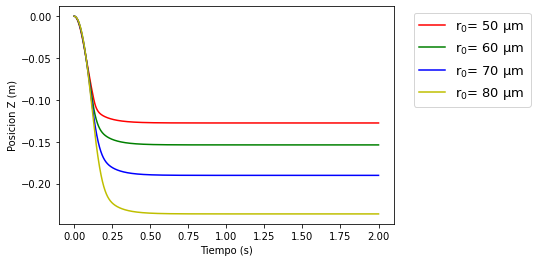

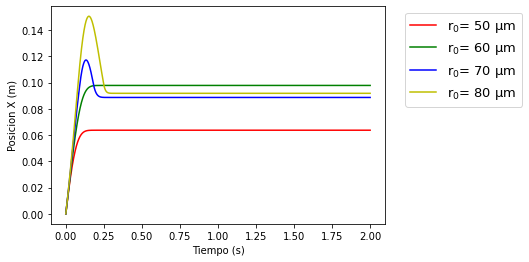

In [3]:
z1= odeint(edo_z, z0, tiempo, args=(50e-6, 5, 0.5))
z2= odeint(edo_z, z0, tiempo, args=(60e-6, 5, 0.5))
z3= odeint(edo_z, z0, tiempo, args=(70e-6, 5, 0.5))
z4= odeint(edo_z, z0, tiempo, args=(80e-6, 5, 0.5))

x1= odeint(edo_x, x0, tiempo, args=(50e-6, 5, 0.5),rtol=1e-9)
x2= odeint(edo_x, x0, tiempo, args=(60e-6, 5, 0.5),rtol=1e-9)
x3= odeint(edo_x, x0, tiempo, args=(70e-6, 5, 0.5),rtol=1e-9)
x4= odeint(edo_x, x0, tiempo, args=(80e-6, 5, 0.5),rtol=1e-9)

##########################
# GRAFICAMOS LA POSICION z
##########################

plt.figure()

plt.plot(tiempo,z1[:,0],'r', label='r$_0$= 50 \N{greek small letter mu}m ')
plt.plot(tiempo,z2[:,0],'g', label='r$_0$= 60 \N{greek small letter mu}m ')
plt.plot(tiempo,z3[:,0],'b', label='r$_0$= 70 \N{greek small letter mu}m ')
plt.plot(tiempo,z4[:,0],'y', label='r$_0$= 80 \N{greek small letter mu}m ')

ax=plt.gca()
#ax.set_title('Simulacion gota Z(t)')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Posicion Z (m)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size': 13})
#plt.legend(bbox_to_anchor=(-0.1,-0.5,2,1), loc='lower left',prop={'size': 13}, ncol=3)
plt.axis()
plt.show()

##########################
# GRAFICAMOS LA POSICION x
##########################

plt.figure()

plt.plot(tiempo,x1[:,0],'r', label='r$_0$= 50 \N{greek small letter mu}m ')
plt.plot(tiempo,x2[:,0],'g', label='r$_0$= 60 \N{greek small letter mu}m ')
plt.plot(tiempo,x3[:,0],'b', label='r$_0$= 70 \N{greek small letter mu}m ')
plt.plot(tiempo,x4[:,0],'y', label='r$_0$= 80 \N{greek small letter mu}m ')

ax=plt.gca()
#ax.set_title('Simulacion gota Z(t)')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Posicion X (m)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size': 13})
#plt.legend(bbox_to_anchor=(-0.1,-0.5,2,1), loc='lower left',prop={'size': 13}, ncol=3)
plt.axis()
plt.show()


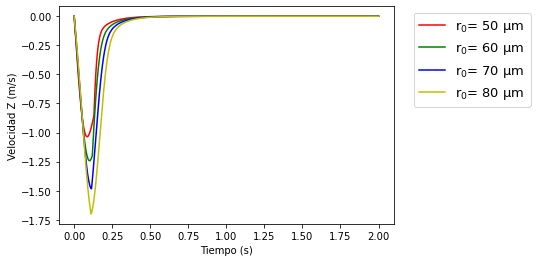

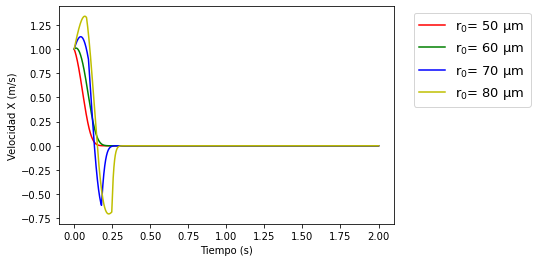

In [4]:
##########################
# GRAFICAMOS LA VELOCIDAD z
##########################

plt.figure()

plt.plot(tiempo,z1[:,1],'r', label='r$_0$= 50 \N{greek small letter mu}m ')
plt.plot(tiempo,z2[:,1],'g', label='r$_0$= 60 \N{greek small letter mu}m ')
plt.plot(tiempo,z3[:,1],'b', label='r$_0$= 70 \N{greek small letter mu}m ')
plt.plot(tiempo,z4[:,1],'y', label='r$_0$= 80 \N{greek small letter mu}m ')

ax=plt.gca()
#ax.set_title('Simulacion gota Z(t)')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Velocidad Z (m/s)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size': 13})
#plt.legend(bbox_to_anchor=(-0.1,-0.5,2,1), loc='lower left',prop={'size': 13}, ncol=3)
plt.axis()
plt.show()

##########################
# GRAFICAMOS LA VELOCIDAD x
##########################

plt.figure()

plt.plot(tiempo,x1[:,1],'r', label='r$_0$= 50 \N{greek small letter mu}m ')
plt.plot(tiempo,x2[:,1],'g', label='r$_0$= 60 \N{greek small letter mu}m ')
plt.plot(tiempo,x3[:,1],'b', label='r$_0$= 70 \N{greek small letter mu}m ')
plt.plot(tiempo,x4[:,1],'y', label='r$_0$= 80 \N{greek small letter mu}m ')

ax=plt.gca()
#ax.set_title('Simulacion gota Z(t)')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Velocidad X (m/s)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={'size': 13})
#plt.legend(bbox_to_anchor=(-0.1,-0.5,2,1), loc='lower left',prop={'size': 13}, ncol=3)
plt.axis()
plt.show()

In [ ]:
fig= plt.figure(figsize=(5,5), facecolor='w')
ax= fig.add_subplot(1,1,1)
plt.rcParams['font.size']=13
plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\orlan\\Desktop\\ffmpeg.exe'

lns=[]

for i in range(len(tiempo)):
    ln,=ax.plot(x2[i,0]*1e2, z2[i,0]*1e2,'bo',ms= 10)
    tm = ax.text(0, 3, 'Tiempo = %.3fs' % tiempo[i],fontsize=10)
    #print(t[i])
    #print(i)
    #print('-------------')
    lns.append([ln, tm])
ax=plt.gca()    
ax.set_aspect('equal', 'datalim')
ax.set_xlabel('X (cm)')
ax.set_ylabel('Z (cm)')
ax.grid()
ani= animation.ArtistAnimation(fig, lns, interval=50)
#ani
#plt.show()

In [ ]:
## UNCOMMENT TO SAVE THE ANIMATION IN PATH fn

#fn = 'C:\\Users\\orlan\\Desktop\\Carpetas\\UNI\\Semestres\\20-1\\Tecnicas Fisicas para la Industria\\Simulaciones\\sim_microgota_2d'
#ani.save(fn+'.mp4',writer='ffmpeg',fps=1000/50)

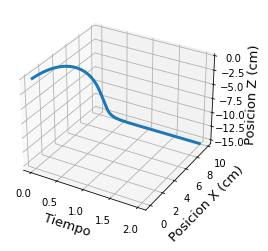

In [5]:
from mpl_toolkits.mplot3d import Axes3D

#%matplotlib notebook

fig= plt.figure()
#ax= Axes3D(fig)
ax= fig.add_subplot(1,1,1, projection='3d')
ax.plot(tiempo,x2[:,0]*1e2,z2[:,0]*1e2, lw='3')
ax.set_xlabel('Tiempo',fontsize=13)
ax.set_ylabel('Posicion X (cm)',fontsize=13)
ax.set_zlabel('Posicion Z (cm)',fontsize=13)

plt.show()
